In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

In [3]:
df1 = pd.read_csv('Combined_News_DJIA.csv')
df2 = pd.read_csv('upload_DJIA_table.csv')

In [4]:
df1.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""


In [5]:
df2.head(1)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141


In [6]:
df1.shape

(1989, 27)

In [7]:
df1['Top1'][0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"'

In [8]:
df = df1.merge(df2, how = 'inner', on='Date')

In [9]:
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727


In [10]:
headlines = []
for row in range(0,len(df.index)):
    headlines.append(' '.join(str(x) for x in df.iloc[row,2:27]))

In [11]:
headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [12]:
clean_headlines = []

for i in range(0,len(headlines)):
    clean_headlines.append(re.sub('b[(")]',"",headlines[i]))
    clean_headlines[i] = re.sub("b[(\'')]","",clean_headlines[i])
    clean_headlines[i] = re.sub("\'","",clean_headlines[i])

In [13]:
clean_headlines[0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

In [14]:
df['Combined_News'] = clean_headlines

In [15]:
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,Remember that adorable 9-year-old who sang at ...


In [16]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [17]:
df['Subjectivity'] = df['Combined_News'].apply(getSubjectivity) #personal opinion or judgement 0 - objective, 1-subjective
df['Polarity'] = df['Combined_News'].apply(getPolarity)

In [18]:
df.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News,Subjectivity,Polarity
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...,0.374806,0.121956


In [19]:
def getSIA(text):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)
    return sentiment

In [20]:
compound = []
neg = []
pos = []
neu = []
SIA = {}

for i in range(0,len(df)):
    SIA = getSIA(df['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

In [21]:
df['compound'] = compound
df['neg'] = neg
df['pos'] = pos
df['neu'] = neu

In [22]:
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Close,Volume,Adj Close,Combined_News,Subjectivity,Polarity,compound,neg,pos,neu
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9975,0.226,0.057,0.717
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9814,0.189,0.099,0.712
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,11642.469727,173590000,11642.469727,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9778,0.137,0.052,0.811


In [23]:
df_backup = df.copy()

# EDA

In [24]:
from wordcloud import WordCloud
wc = WordCloud(height=500,width=500,min_font_size=10,background_color='white')

In [25]:
positive = wc.generate(df[df['Label']==1]['Combined_News'].str.cat(sep = " "))

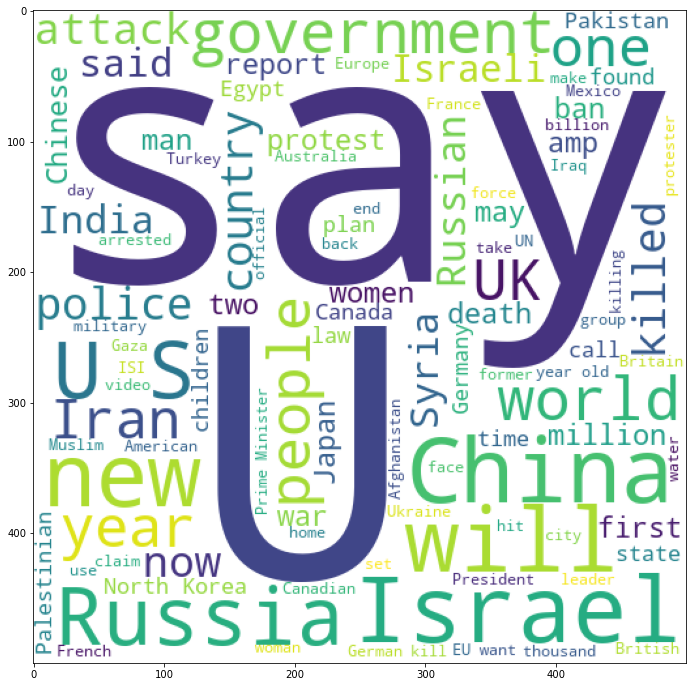

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(positive)
plt.show()

In [27]:
negative = wc.generate(df[df['Label']==0]['Combined_News'].str.cat(sep = " "))

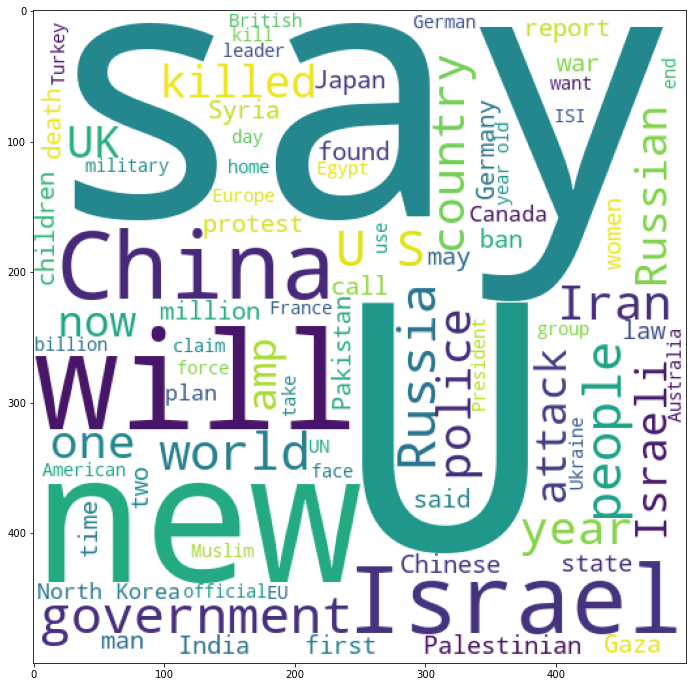

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(negative)
plt.show()

In [29]:
df.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Close,Volume,Adj Close,Combined_News,Subjectivity,Polarity,compound,neg,pos,neu
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9975,0.226,0.057,0.717


In [30]:
df = df[['Combined_News']]

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv = CountVectorizer(ngram_range=(2,2))

In [33]:
df_cv = cv.fit_transform(df['Combined_News'])

In [34]:
X = df_cv.toarray()

In [35]:
X = pd.DataFrame(X)

In [36]:
y = df_backup['Label']

In [37]:
df.head()

,Combined_News
0,Georgia downs two Russian warplanes as countri...
1,Why wont America and Nato help us? If they won...
2,Remember that adorable 9-year-old who sang at ...
3,U.S. refuses Israel weapons to attack Iran: r...
4,All the experts admit that we should legalise ...


In [38]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,439418,439419,439420,439421,439422,439423,439424,439425,439426,439427
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y.shape

(1989,)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

In [41]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
svc = SVC(kernel= 'sigmoid', gamma=0.1)
lgc = LogisticRegression()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=200)
rfc = RandomForestClassifier(n_estimators =200)
abc = AdaBoostClassifier(n_estimators =200)
gbc = GradientBoostingClassifier(n_estimators=200)
xbc = XGBClassifier(n_estimators=200)
bc = BaggingClassifier(n_estimators=200)

In [43]:
classifiers = {'SVC' : svc,
              'LGC' :  lgc,
               'MNB' : mnb,
               'DTC' : dtc,
               'RFC' : rfc,
               'ADC' : abc,
               'GBC' : gbc,
               'XBG' : xbc,
               'BC'  : bc}

In [44]:
for name, clf in classifiers.items():
    model = clf.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    
    print('Name : {}, Accuracy_score : {}, Precision_score {}'.format(name, accuracy_score(y_test,y_pred), precision_score(y_test,y_pred)))
    

Name : SVC, Accuracy_score : 0.5301204819277109, Precision_score 0.5795918367346938
Name : LGC, Accuracy_score : 0.5562248995983936, Precision_score 0.5769230769230769
Name : MNB, Accuracy_score : 0.4718875502008032, Precision_score 0.51953125
Name : DTC, Accuracy_score : 0.5140562248995983, Precision_score 0.555956678700361
Name : RFC, Accuracy_score : 0.5481927710843374, Precision_score 0.5491803278688525


KeyboardInterrupt: 